# Exercise 1. kNN - own implementation 

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import numpy as np

In [2]:
iris = datasets.load_iris()
 
#Podziel zbiór na uczący i testowy, test_size - procentowy udział (przykład 50 % uczący i testowy)
features_train, features_test, labels_train, labels_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [3]:
# choose k - the number of neighbours
 k = 5

In [4]:
features_train.shape

(105, 4)

In [5]:
def calculate_pred_kNN(k, features_train, labels_train, features_test):
    predictions = list()
    for i in features_test:
        distances = list()
        for j,h in zip(features_train, labels_train):
            distances.append((j, distance.euclidean(i, j), h))
        distances.sort(key = lambda tup: tup[1])
        neighbours = list()
        for h in range(k):
            neighbours.append((distances[h][0], distances[h][2]))
        output_vals = [row[-1] for row in neighbours]
        predictions.append(max(set(output_vals), key=output_vals.count))
    return predictions

In [6]:
preds = calculate_pred_kNN(k, features_train, labels_train, features_test)
preds = np.array(preds)
preds

array([2, 0, 1, 1, 2, 2, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       1])

In [7]:
labels_test

array([2, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 0, 2, 2, 0, 0, 0, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 1, 0, 0, 1,
       1])

In [8]:
# Sprawdzanie skuteczności klasyfikatora na danych treningowych
output = accuracy_score(labels_test, preds)
print(output)

0.9333333333333333


# Exercise 2. using sklearn

In [9]:
db_iris = datasets.load_iris()

In [10]:
features_train, features_test, labels_train, labels_test = train_test_split(db_iris.data, db_iris.target, test_size=0.3)

In [11]:
 k = 5

In [12]:
neigh = KNeighborsClassifier(n_neighbors=k)

In [13]:
neigh.fit(features_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
predictions = neigh.predict(features_test)

In [15]:
# Sprawdzanie skuteczności klasyfikatora na danych treningowych
accuracy_score(labels_test, predictions)

0.9555555555555556

# Exercise 3. - using decision trees

In [16]:
clf = tree.DecisionTreeClassifier()
clf.fit(db_iris.data, db_iris.target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
clf.predict(db_iris.data[:1, :])

array([0])

In [18]:
clf.predict_proba(db_iris.data[:1, :])

array([[1., 0., 0.]])

In [19]:
from six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("iris.pdf")

In [20]:
graph[0].write_png("iris.png")

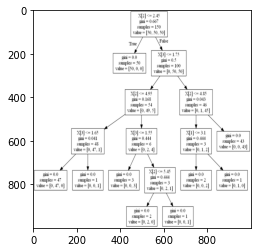

In [21]:
import cv2
import matplotlib.pyplot as plt

im = cv2.imread('iris.png')
im_resized = cv2.resize(im, (1000, 1000), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Result graph stored also in .pdf file

# Task - classiffication of handwritten digits

In [22]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

In [23]:
# input data
dane = loadmat('mnist.mat')

In [24]:
dane

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [25]:
X = dane['X']

In [26]:
y = dane['y']

In [27]:
X.shape

(5000, 400)

In [28]:
# Data standarization
for row in X:
    row =  (row)  / np.std(row)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# zamiana cyfry 10 -> 0 (błąd w zbiorze danych)
y[np.where(y==10)] = 0

In [30]:
# wysokość i szerokość obrazka z cyfrą 
h = 20
w = 20

In [58]:
def plot_mnist(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.05)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)).T, cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [67]:
sample_digits = X[3600:3608, :]
sample_labels = y[3600:3608, :]

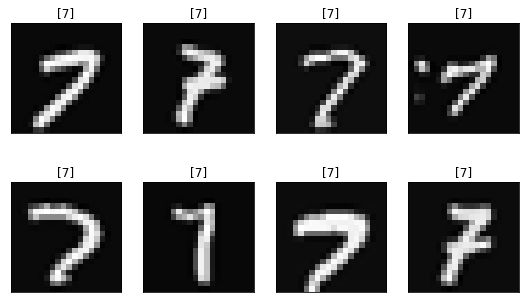

In [68]:
plot_mnist(sample_digits, sample_labels, 20, 20, 2, 4)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [75]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 10)

In [76]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [77]:
dot_data = StringIO() 
tree.export_graphviz(decision_tree, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph[0].write_pdf("mnist.pdf")

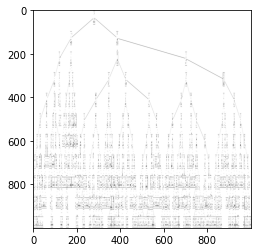

In [78]:
graph[0].write_png("mnist.png")
im = cv2.imread('mnist.png')
im_resized = cv2.resize(im, (1000, 1000), interpolation=cv2.INTER_LINEAR)

plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
plt.show()

Result graph stored also in .pdf file

In [79]:
predictions = decision_tree.predict(X_test)

Przedstawienie F1 score

In [80]:
f1_score(y_test, predictions, average='weighted')

0.7563887730882022

Macierz pomyłek (confusion matrix)

In [81]:
confusion_matrix(y_test, predictions)

array([[127,   1,   3,   2,   2,   3,   1,   1,   3,   2],
       [  0, 151,   3,   2,   1,   2,   0,   5,   5,   0],
       [  2,   8,  95,   6,   3,   6,   3,   5,   6,   4],
       [  1,   3,  17, 101,   3,   8,   3,   3,   6,   8],
       [  1,   3,   1,   0, 109,   4,   5,   3,   1,   9],
       [  4,   6,   4,  13,   7, 108,   4,   3,  13,  11],
       [  3,   4,   3,   1,   3,   6, 110,   1,   6,   2],
       [  4,   1,   2,   5,   8,   1,   2, 111,   1,   7],
       [  0,   6,  10,   9,   2,   7,   2,   0, 110,   7],
       [  1,   3,   3,   9,   7,   4,   1,   8,   2, 114]], dtype=int64)

Raport klasyfikacji

In [82]:
classification_report(y_test, predictions, output_dict=True)

{'0': {'precision': 0.8881118881118881,
  'recall': 0.8758620689655172,
  'f1-score': 0.8819444444444444,
  'support': 145},
 '1': {'precision': 0.8118279569892473,
  'recall': 0.893491124260355,
  'f1-score': 0.8507042253521125,
  'support': 169},
 '2': {'precision': 0.6737588652482269,
  'recall': 0.6884057971014492,
  'f1-score': 0.6810035842293907,
  'support': 138},
 '3': {'precision': 0.6824324324324325,
  'recall': 0.6601307189542484,
  'f1-score': 0.6710963455149502,
  'support': 153},
 '4': {'precision': 0.7517241379310344,
  'recall': 0.8014705882352942,
  'f1-score': 0.7758007117437723,
  'support': 136},
 '5': {'precision': 0.7248322147651006,
  'recall': 0.6242774566473989,
  'f1-score': 0.670807453416149,
  'support': 173},
 '6': {'precision': 0.8396946564885496,
  'recall': 0.7913669064748201,
  'f1-score': 0.8148148148148148,
  'support': 139},
 '7': {'precision': 0.7928571428571428,
  'recall': 0.7816901408450704,
  'f1-score': 0.7872340425531914,
  'support': 142},
 '